<a href="https://colab.research.google.com/github/alissaleigh/P2/blob/main/P2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data pulled from [here](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download)

#Uploading/Importing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from sklearn import set_config
import seaborn as sns
import pandas as pd
import numpy as np
set_config(display='diagram')

In [3]:
filename = '/content/drive/MyDrive/panda/adult.csv'
df = pd.read_csv(filename)

#Cleaning

###Overview Prior to Cleaning

Can't see where we end up if we don't know where we started

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [6]:
df.duplicated().sum()

52

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


###Removing Unnessary Data

####Removing Columns

I'm removing education as we have educational-num which breaks down education into a numarical list that will make creating models easier later.


I'm also removing fnlwgt (total weight/income) as the focus of the model will be about whether someone makes more or less then 50K in order to keep things simple. I don't need the total amount each person made as it doesn't benfit the model.

Looking back over the data I am also going to remove the capital gain/loss columns. Both are less a 1000 rows that aren't just 0, with is almost nothing in this particualr data set.

In [8]:
df = df.drop(columns=['education', 'fnlwgt', 'capital-gain', 'capital-loss'])
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


####Removing Catagories and Other Unnecessary Data

At recomendation, converting '?' to unfilled to remove that unneeded data. Looking through the data there are three columns that use ? as a placeholder for missing as you'll see bellow.

[Using this link to get formulas](https://datascienceparichay.com/article/pandas-emove-categories-from-a-categorical-column/)

In [9]:
df["workclass"] = df["workclass"].astype("category")
df["workclass"] = df["workclass"].cat.remove_categories('?')
df["workclass"] = df["workclass"].cat.remove_categories('Without-pay')
df["workclass"] = df["workclass"].cat.remove_categories('Never-worked')
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [10]:
df["occupation"] = df["occupation"].astype("category")
df["occupation"] = df["occupation"].cat.remove_categories("?")
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K


In [11]:
df["native-country"] = df["native-country"].astype("category")
df["native-country"] = df["native-country"].cat.remove_categories("?")
df.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K


In [12]:
#this was terrifying to look at, but then I scrolled back up to the info cell and remembered how much data total is in this set
df.isna().sum()

age                   0
workclass          2830
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

###Removing Duplicates

In [14]:
df.duplicated().sum()

7327

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

0

###Fixing Inconsistencies and Missing Data

So I did review all the value counts and there aren't any inconsistencies within the data as well

In [16]:
df.nunique()

age                74
workclass           6
educational-num    16
marital-status      7
occupation         14
relationship        6
race                5
gender              2
hours-per-week     96
native-country     41
income              2
dtype: int64

In [17]:
df.isna().sum()

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

###Cleaning Up Catagoties


I'm going one final clean up in the workclass column and that's condensing the gov work to just goverment

In [18]:
df['workclass'].value_counts()

Private             26560
Self-emp-not-inc     3612
Local-gov            2908
State-gov            1879
Self-emp-inc         1559
Federal-gov          1356
Name: workclass, dtype: int64

In [19]:
# Standardize the values in the Sex column
df['workclass'] = df['workclass'].replace('Local-gov', 'Goverment')
df['workclass'] = df['workclass'].replace('State-gov', 'Goverment')
df['workclass'] = df['workclass'].replace('Federal-gov', 'Goverment')
df['workclass'].value_counts()

Private             26560
Goverment            6143
Self-emp-not-inc     3612
Self-emp-inc         1559
Name: workclass, dtype: int64

##Visuals / Futher Exploration

<Axes: >

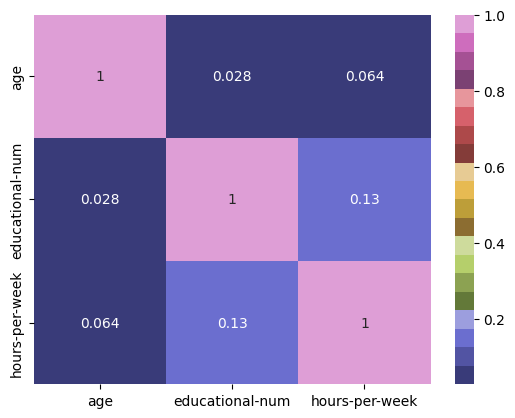

In [20]:
corr = df.corr()
sns.heatmap(corr, cmap = 'tab20b', annot = True)

Looking at the heat map, it looks mostly on the lower end, but I do think it's intresting to see the higer scores are with education level and hours worked.

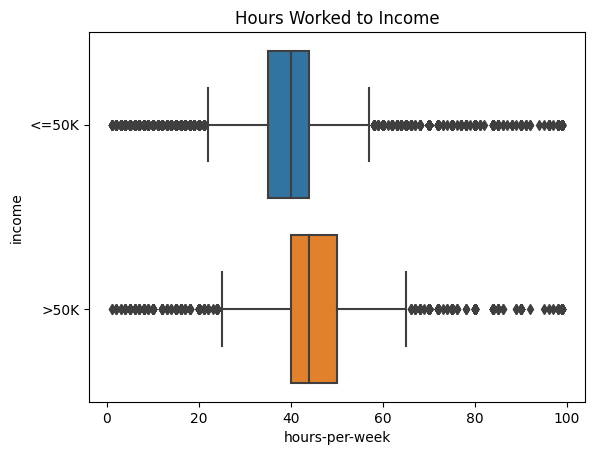

In [21]:
ax = sns.boxplot(y='income', x='hours-per-week', data=df)
ax.set_title("Hours Worked to Income");

Looking at the above boxplot, I don't think it's too shocking that people who are making more, work more. There is a level of expecation in may jobs that when working a higher paying postion, espically a salary postion, that you will work more.

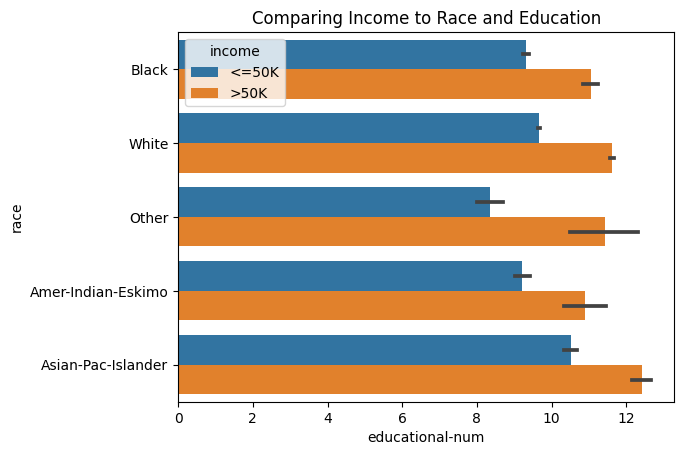

In [22]:
ax = sns.barplot(data=df, y='race', x='educational-num', hue='income');
ax.set_title("Comparing Income to Race and Education");

When looking ath the above barplot I don't find it too shocking to see that those with highter education, regardless of race, have higher paying posisitions.

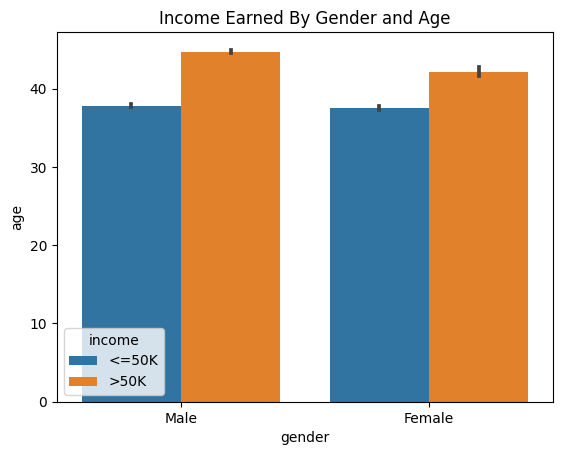

In [23]:
ax = sns.barplot(data=df, y='age', x='gender', hue='income');
ax.set_title("Income Earned By Gender and Age");

I think the most suprsing thing of the above barplot is who close the income below or equal to 50k is acorss both genders. I looks to be about the same, if not the same.

In [24]:
# Create filter for females and save as df_female
female_filter = df['gender'] == "Female"
df_female = df.loc[female_filter]
df_female.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K
12,26,Private,9,Never-married,Adm-clerical,Not-in-family,White,Female,39,United-States,<=50K
17,43,Private,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,30,United-States,<=50K
18,37,Private,9,Widowed,Machine-op-inspct,Unmarried,White,Female,20,United-States,<=50K
21,34,Private,10,Never-married,Other-service,Own-child,Black,Female,35,United-States,<=50K


In [25]:
# Save the opposite rows as df_male using ~female_filter
df_male = df.loc[~female_filter]
df_male.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Goverment,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


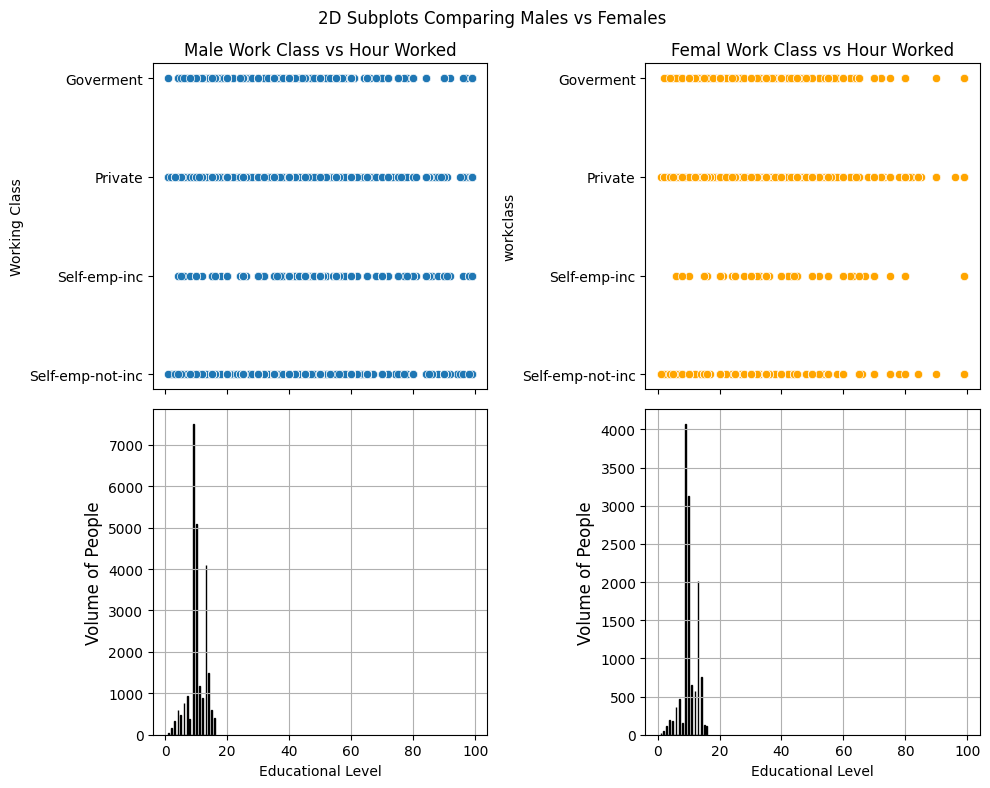

In [26]:
## Creating subplots with 2 rows and 2 columns, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8),
                         sharex=True)
## Plotting male data
# Subplot 0,0 (top-left)
sns.scatterplot(data=df_male, x='hours-per-week', y='workclass', ax=axes[0,0])
axes[0,0].set_title('Male Work Class vs Hour Worked', fontsize = 12);
axes[0,0].set_ylabel("Working Class")
axes[0,0].set_xlabel("Hours Wored per Week")
# Subplot 1,0 (bottom-left)
df_male['educational-num'].hist(bins='auto', edgecolor='black',ax=axes[1,0])
axes[1,0].set_ylabel('Volume of People', fontsize = 12);
axes[1,0].set_xlabel("Educational Level")
## Plotting female data
# Subplot 0,1 (top-right)
sns.scatterplot(data=df_female, x='hours-per-week', y='workclass', ax=axes[0,1],
                color='orange')
axes[0,1].set_title('Femal Work Class vs Hour Worked', fontsize = 12)
axes[0,0].set_ylabel("Working Class")
# Subplot 1,1 (bottom-right)
df_female['educational-num'].hist(bins='auto', edgecolor='black',ax=axes[1,1],
                         color='orange')
axes[1,1].set_ylabel('Volume of People', fontsize = 12);
axes[1,1].set_xlabel("Educational Level")
## Figure title and fixing overlap
fig.suptitle("2D Subplots Comparing Males vs Females ");
fig.tight_layout();

Looking at the above visuals you can see that Men tend to have a higher education and persons working a goverment job work the most amount of hours generally speaks

##Ordinal Encoding

I tried using One Hot first as I thought it would be faster and more efficant, however I was getting an error with regards to things not fully converting, so in order to covert the data without getting those errors for the models I ended up doing ordinal encoding.

With regards to ordering, I am putting the largest catagories in the columns at 0 and working my way up as the volume in each catagory goes down.

In [27]:
df['gender'].value_counts()

Male      24904
Female    12970
Name: gender, dtype: int64

In [28]:
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)
df['gender'].value_counts()

0    24904
1    12970
Name: gender, dtype: int64

In [29]:
df['native-country'].value_counts()

United-States                 33982
Mexico                          876
Philippines                     279
Germany                         192
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         102
South                           101
Italy                            99
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           54
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [30]:
df['native-country'].replace({'United-States':0, 'Mexico':1, 'Philippines':2, 'Germany':3, 'Puerto-Rico':4, 'Canada':5,
                          'El-Salvador':6, 'India':7, 'Cuba':8, 'England':9, 'China':10,'Jamaica':11, 'South':12,
                          'Italy':13, 'Dominican-Republic':14, 'Japan':15, 'Guatemala':16, 'Vietnam': 17, 'Columbia':18,
                          'Poland':19, 'Haiti':20, 'Portugal':21, 'Iran':22, 'Taiwan':23, 'Greece':24, 'Nicaragua':25,
                          'Peru':26, 'Ecuador':27, 'France':28, 'Ireland':29, 'Thailand':30, 'Hong':31, 'Trinadad&Tobago':32,
                          'Cambodia':33, 'Yugoslavia':34, 'Outlying-US(Guam-USVI-etc)':35, 'Laos':36, 'Scotland':37, 
                          'Honduras':38, 'Hungary':39, 'Holand-Netherlands':40}, inplace=True)
df['native-country'].value_counts()

0     33982
1       876
2       279
3       192
4       175
5       163
6       147
7       147
8       133
9       119
10      113
11      102
12      101
13       99
14       97
15       89
16       84
17       83
18       82
19       81
20       69
21       62
22       56
23       54
24       49
25       48
26       45
27       43
28       36
29       35
30       29
31       28
32       26
33       26
34       23
35       22
36       21
37       20
38       19
39       18
40        1
Name: native-country, dtype: int64

In [31]:
df['income'].value_counts()

<=50K    28729
>50K      9145
Name: income, dtype: int64

In [32]:
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
df['income'].value_counts()

0    28729
1     9145
Name: income, dtype: int64

In [33]:
df['marital-status'].value_counts()

Married-civ-spouse       16860
Never-married            11948
Divorced                  5835
Separated                 1391
Widowed                   1257
Married-spouse-absent      551
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [34]:
df['marital-status'].replace({'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2, 'Separated':3, 'Widowed':4,
                              'Married-spouse-absent':5, 'Married-AF-spouse':6}, inplace=True)
df['marital-status'].value_counts()

0    16860
1    11948
2     5835
3     1391
4     1257
5      551
6       32
Name: marital-status, dtype: int64

In [35]:
df['relationship'].value_counts()

Husband           14596
Not-in-family     10376
Own-child          5090
Unmarried          4527
Wife               1968
Other-relative     1317
Name: relationship, dtype: int64

In [36]:
df['relationship'].replace({'Husband':0, 'Wife':0, 'Not-in-family':1, 'Own-child':2, 'Unmarried':3, 'Other-relative':4},
                           inplace=True)
df['relationship'].value_counts()

0    16564
1    10376
2     5090
3     4527
4     1317
Name: relationship, dtype: int64

In [37]:
df['race'].value_counts()

White                 31721
Black                  4070
Asian-Pac-Islander     1296
Amer-Indian-Eskimo      434
Other                   353
Name: race, dtype: int64

In [38]:
df['race'].replace({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4},
                           inplace=True)
df['race'].value_counts()

0    31721
1     4070
2     1296
3      434
4      353
Name: race, dtype: int64

In [39]:
df['occupation'].replace({'Prof-specialty':0, 'Exec-managerial':1, 'Adm-clerical':2, 'Sales':3, 'Craft-repair':4, 'Other-service':5,
                          'Machine-op-inspct':6, 'Transport-moving':7, 'Handlers-cleaners':8, 'Farming-fishing':9, 'Tech-support':10,
                          'Protective-serv':11, 'Priv-house-serv':12, 'Armed-Forces':13}, inplace=True)
df['occupation'].value_counts()

0     5278
1     5016
2     4640
3     4483
4     4371
5     4206
6     2355
7     1975
8     1679
9     1403
10    1298
11     927
12     229
13      14
Name: occupation, dtype: int64

In [40]:
df['workclass'].value_counts()

Private             26560
Goverment            6143
Self-emp-not-inc     3612
Self-emp-inc         1559
Name: workclass, dtype: int64

In [41]:
df['workclass'].replace({'Private':0, 'Goverment':1, 'Self-emp-not-inc':2, 'Self-emp-inc':3}, inplace=True)
df['workclass'].value_counts()

0    26560
1     6143
2     3612
3     1559
Name: workclass, dtype: int64

#Modeling

I'm making income the target and using classification modles as this data set is about looking at factors of what might infulance someone being above or bellow that 50K line

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
y = df['income']
X = df.drop(columns = 'income')

I'm using a decision and random tree classifiers as I wanted to see which would pull more accuate data as both are good for this classification, however the decision tree will be faster, but the random tree can be more accurate. I am also chosing the KNN as a thrid model as it can be very accurate and I do like how KNN looks when you add in the GridSearchCV to it.

##Decision Tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)

In [46]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [47]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [48]:
dec_tree.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [49]:
# calculate classification accuracy
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.811582467875374
0.8061041292639138


###Tuning with GridSearchCV

In [50]:
model = DecisionTreeClassifier()
 
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [51]:
dt_grid_search = GridSearchCV(model, param_grid)

In [52]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [53]:
dt_grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [54]:
param_grid2 = {'max_depth': [2, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}
 
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [55]:
#retrieve the best version of the model
best_model = dt_grid_search2.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.8104340479459288

##Random Tree

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
rf = RandomForestClassifier(random_state = 42)

In [58]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
rf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [61]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9723288153494103
0.7829760270355898


In [62]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

44

In [63]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestClassifier(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

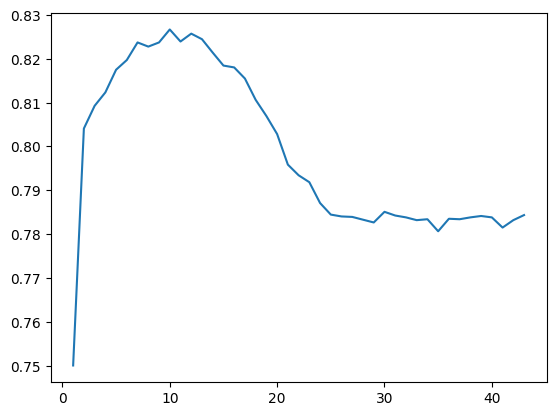

In [64]:
plt.plot(scores['Test Score'])

In [65]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
10,0.826698,0.849604
12,0.825747,0.868087
13,0.82448,0.878437
11,0.823952,0.857279
7,0.823741,0.831685


In [66]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(max_depth=9, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.825008,0.842985
100,0.823635,0.842704
150,0.824691,0.842281
200,0.825536,0.843197
250,0.82448,0.842316


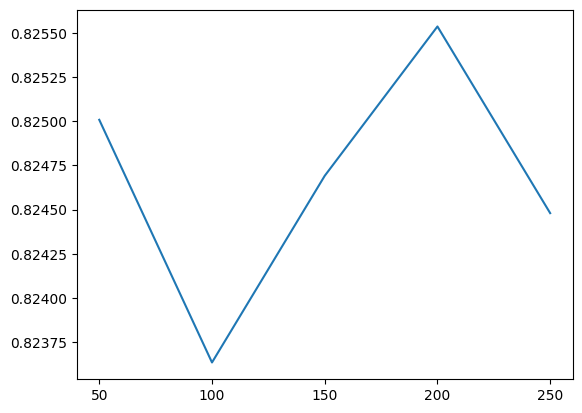

In [67]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [68]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
200,0.825536,0.843197
50,0.825008,0.842985
150,0.824691,0.842281
250,0.82448,0.842316
100,0.823635,0.842704


###Tuning with GridSearchCV

In [69]:
model = RandomForestClassifier()
 
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [70]:
dt_grid_search = GridSearchCV(model, param_grid)

In [71]:
dt_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [72]:
dt_grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [73]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}
 
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [74]:
#retrieve the best version of the model
best_model = dt_grid_search2.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.8256415672193473

##KNN

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [76]:
scaler = StandardScaler()

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [79]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.7972330763544196

###Tuning with GridSearchCV

In [81]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [82]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [83]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8089555391276798


#Final Thoughts

Taking this production I would chose to use the Random Tree Classifier with the GridSearchCV as it produced the most acurate scoring for the model with a score of .824, even if it took a bit of time to run.